In [3]:
# load python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv("/content/NHIS_Vision_and_Eye_Health_Surveillance_20240501.csv")
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract w...,Yes,65-84 years,...,QCATS,RYES,NaN,AGE6584,GF,ASN,RFDM,RFBD,NaN,NaN
1,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract w...,Yes,85 years and older,...,QCATS,RYES,NaN,AGE85PLUS,GM,OTH,RFDM,RFNO,NaN,NaN
2,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Refused,40-64 years,...,ISPROT,RRF,NaN,AGE4064,GALL,OTH,RFDM,RFYES,NaN,NaN
3,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Don't Know,40-64 years,...,ISPROT,RDK,NaN,AGE4064,GM,ALLRACE,RFDM,RFYES,NaN,NaN
4,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Some of the time,18-39 years,...,ISPROT,RSOMT,NaN,AGE1839,GM,ASN,RFDM,RFNO,NaN,NaN


In [4]:
data.shape

(17776, 36)

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
total

,0
Geographic Level,17776
GeoLocation,17776
DataValueTypeID,17776
Numerator,17776
Data_Value,9303
High_Confidence_Limit,9303
Low_Confidence_Limit,9303
Data_Value_Footnote_Symbol,8473
Data_Value_Footnote,8473
Sample_Size,4961


In [6]:
# melihat unique value pada kolom riskfactor
data['RiskFactor'].unique()

# menghapus baris dengan nilai NaN di kolom 'RiskFactor'
data = data.dropna(subset=['RiskFactor'])

In [7]:
# Menghapus baris dengan nilai NaN di kolom 'Age'
data = data.dropna(subset=['Age'])

# Mendapatkan kelompok usia
ages = data['Age'].unique()

# Iterasi untuk setiap usia
for age in ages:
    # Filter data untuk setiap pertanyaan
    age_data = data[data['Age'] == age]

    # Menghitung persentase resiko "Diabetes"
    riskdb = age_data[age_data['RiskFactor'] == 'Diabetes']
    rate_db = len(riskdb) / len(age_data) * 100

    # Menghitung persentase resiko "Hypertension"
    riskht = age_data[age_data['RiskFactor'] == 'Hypertension']
    rate_ht = len(riskht) / len(age_data) * 100

    # Menghitung persentase resiko "Smoking"
    risksm = age_data[age_data['RiskFactor'] == 'Smoking']
    rate_sm = len(risksm) / len(age_data) * 100

    # Menghitung persentase resiko "All participants"
    riskall = age_data[age_data['RiskFactor'] == 'All participants']
    rate_all = len(riskall) / len(age_data) * 100

    print(f"Untuk kelompok umur '{age}':")
    print(f"{rate_db:.2f}% menjawab 'Diabetes'.")
    print(f"{rate_ht:.2f}% menjawab 'Hypertension'.")
    print(f"{rate_sm:.2f}% menjawab 'Smoking'.")
    print(f"{rate_all:.2f}% menjawab 'All participants'.\n")

Untuk kelompok umur '65-84 years':
29.46% menjawab 'Diabetes'.
25.50% menjawab 'Hypertension'.
35.03% menjawab 'Smoking'.
10.02% menjawab 'All participants'.

Untuk kelompok umur '85 years and older':
28.80% menjawab 'Diabetes'.
26.55% menjawab 'Hypertension'.
34.56% menjawab 'Smoking'.
10.09% menjawab 'All participants'.

Untuk kelompok umur '40-64 years':
29.52% menjawab 'Diabetes'.
25.84% menjawab 'Hypertension'.
35.03% menjawab 'Smoking'.
9.61% menjawab 'All participants'.

Untuk kelompok umur '18-39 years':
29.62% menjawab 'Diabetes'.
25.72% menjawab 'Hypertension'.
34.79% menjawab 'Smoking'.
9.86% menjawab 'All participants'.

Untuk kelompok umur '18 years and older':
36.04% menjawab 'Diabetes'.
21.76% menjawab 'Hypertension'.
30.30% menjawab 'Smoking'.
11.90% menjawab 'All participants'.

Untuk kelompok umur 'All ages':
33.33% menjawab 'Diabetes'.
25.00% menjawab 'Hypertension'.
33.33% menjawab 'Smoking'.
8.33% menjawab 'All participants'.

Untuk kelompok umur '0-17 years':
0.00

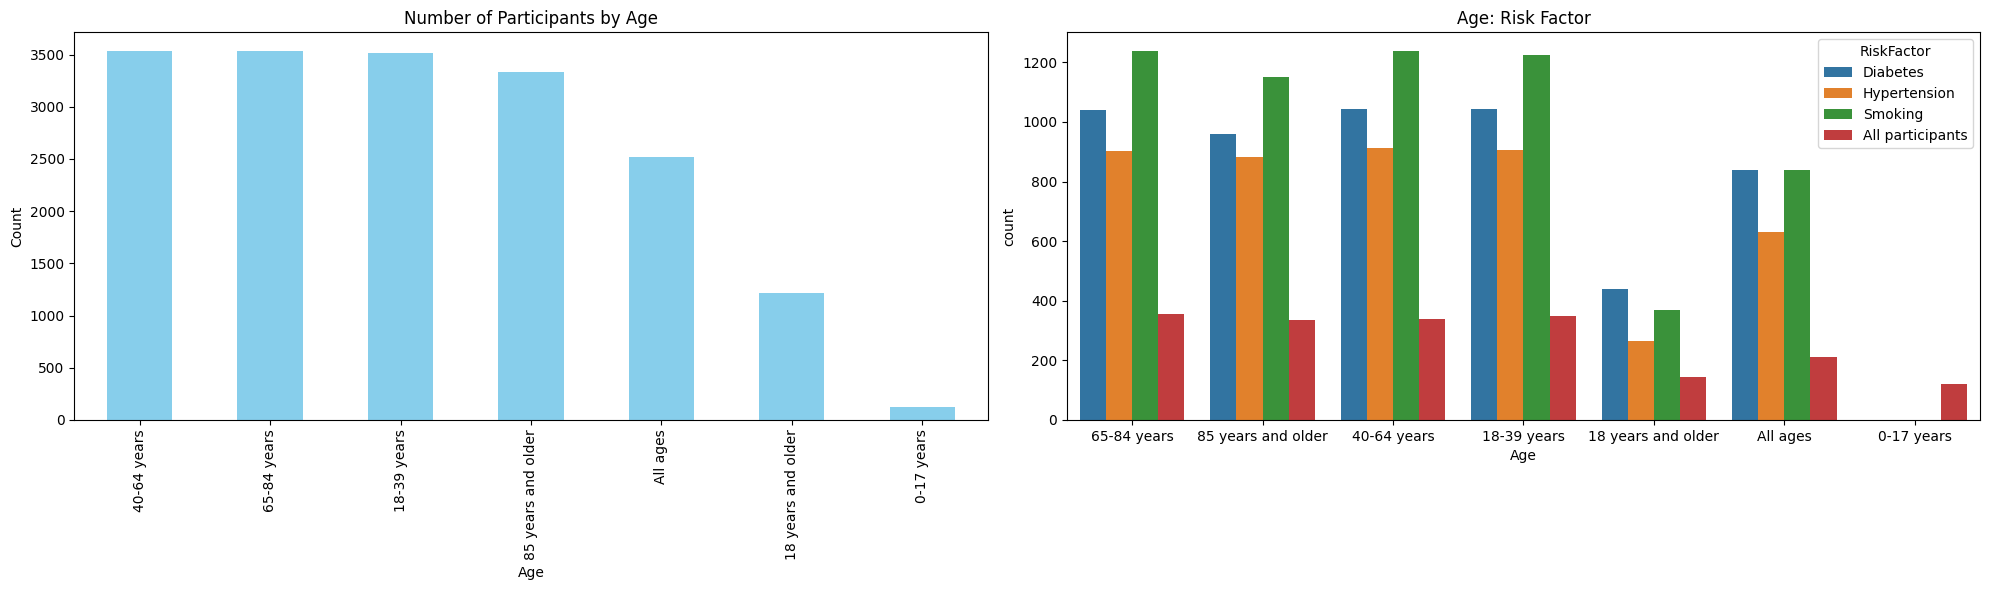

In [8]:
# Distribusi umur partisipan dan resiko faktor
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Membuat plot distribusi jumlah partisipan berdasarkan usia dalam bentuk grafik batang
data['Age'].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Participants by Age")
ax[0].set_ylabel("Count")

# Membuat grafik batang jumlah partisipan berdasarkan usia, dikelompokkan berdasarkan 'RiskFactor' menggunakan countplot
sns.countplot(x="Age", hue="RiskFactor", data=data, ax=ax[1])
ax[1].set_title("Age: Risk Factor")

# Show plot
plt.tight_layout()
plt.show()



*   Grafik kiri menunjukkan jumlah peserta yang dikelompokkan berdasarkan kategori usia.
*   Grafik kanan menunjukkan distribusi faktor risiko kesehatan (Diabetes, Hipertensi, Merokok) di antara peserta dalam berbagai kelompok usia.



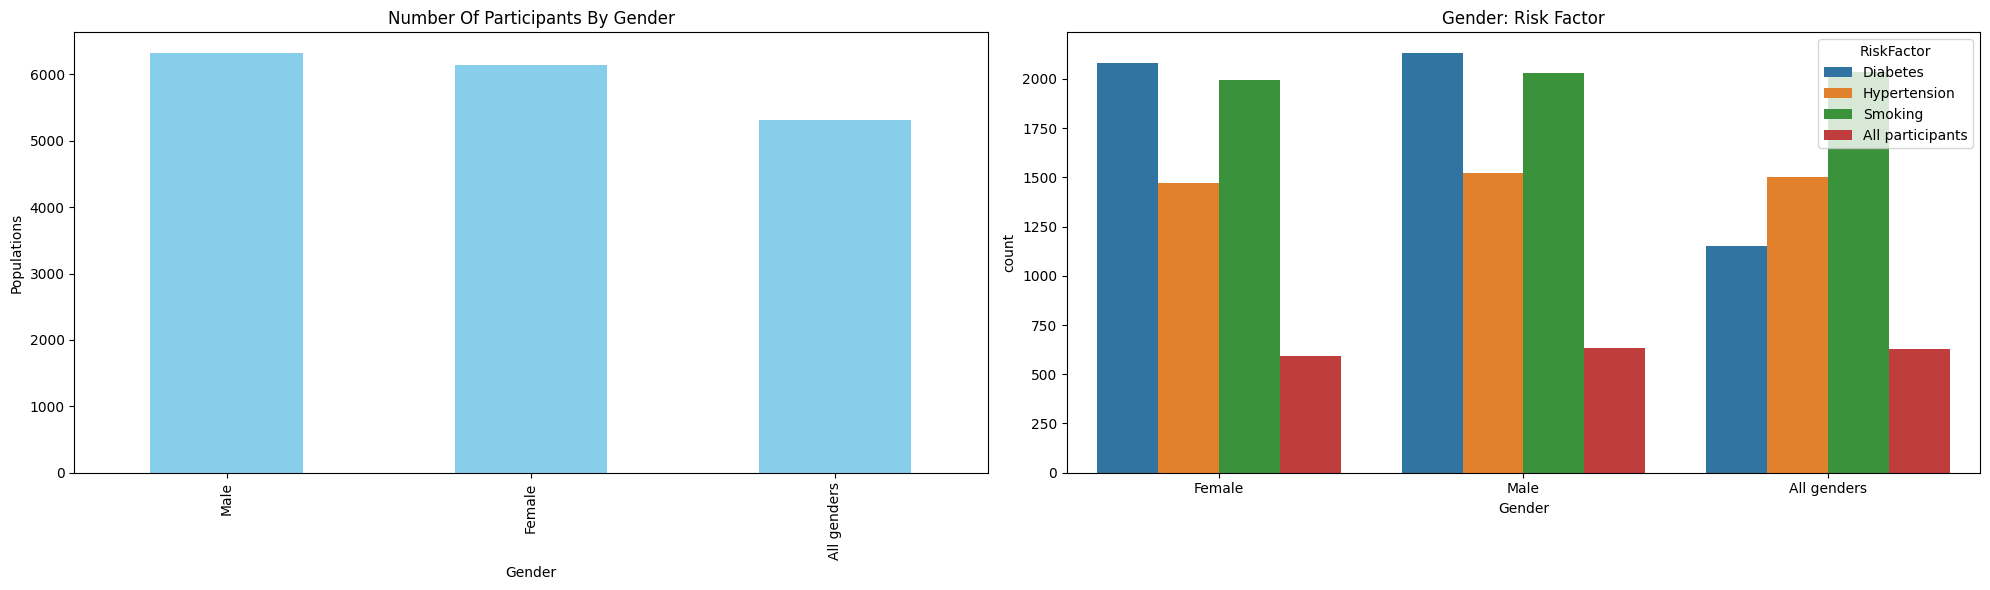

In [9]:
# Distribusi gender partisipan dan resiko faktor
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

# Membuat grafik batang (bar plot) untuk jumlah partisipan berdasarkan gender
data["Gender"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Participants By Gender")
ax[0].set_ylabel("Populations")

# Membuat grafik batang terpisah untuk setiap kategori faktor risiko berdasarkan gender menggunakan countplot
sns.countplot(x="Gender", hue = "RiskFactor", data=data , ax=ax[1])
ax[1].set_title("Gender: Risk Factor")

# Show Plot
plt.tight_layout()
plt.show()



*   Grafik Kiri: Jumlah Peserta Berdasarkan Gender
  
  Male (Laki-laki): Jumlah peserta sekitar 12.000 orang.

  Female (Perempuan): Jumlah peserta juga sekitar 12.000 orang.

  All Genders (Semua Gender): Jumlah peserta sedikit lebih rendah, sekitar 11.000 orang.
*   Grafik Kanan: Faktor Risiko Berdasarkan Gender
  
  Diabetes dan Merokok lebih umum pada laki-laki dibandingkan perempuan.

  Hipertensi lebih umum pada perempuan dibandingkan laki-laki.

  Kategori "All participants" memiliki jumlah yang lebih rendah untuk semua faktor risiko.



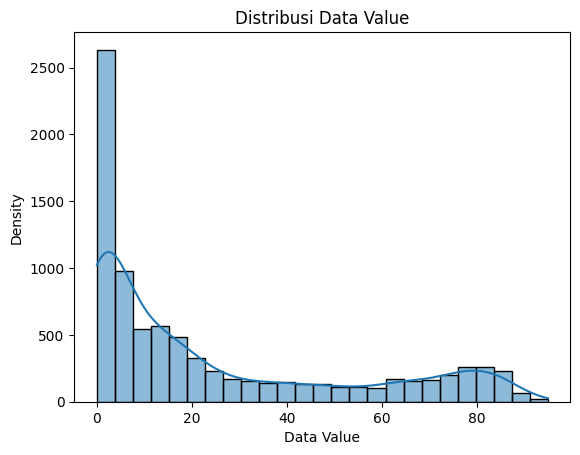

In [10]:
# Membuat grafik distribusi (density plot) untuk kolom 'Data_Value'
sns.histplot(data['Data_Value'].dropna(), kde=True)
plt.title("Distribusi Data Value")
plt.xlabel("Data Value")
plt.ylabel("Density")
plt.show()

* Distribusi yang Positif (Right-Skewed):

  Grafik menunjukkan bahwa sebagian besar nilai dalam kolom "Data Value" berada di kisaran rendah (mendekati 0), dengan kepadatan yang menurun secara signifikan seiring dengan peningkatan nilai.


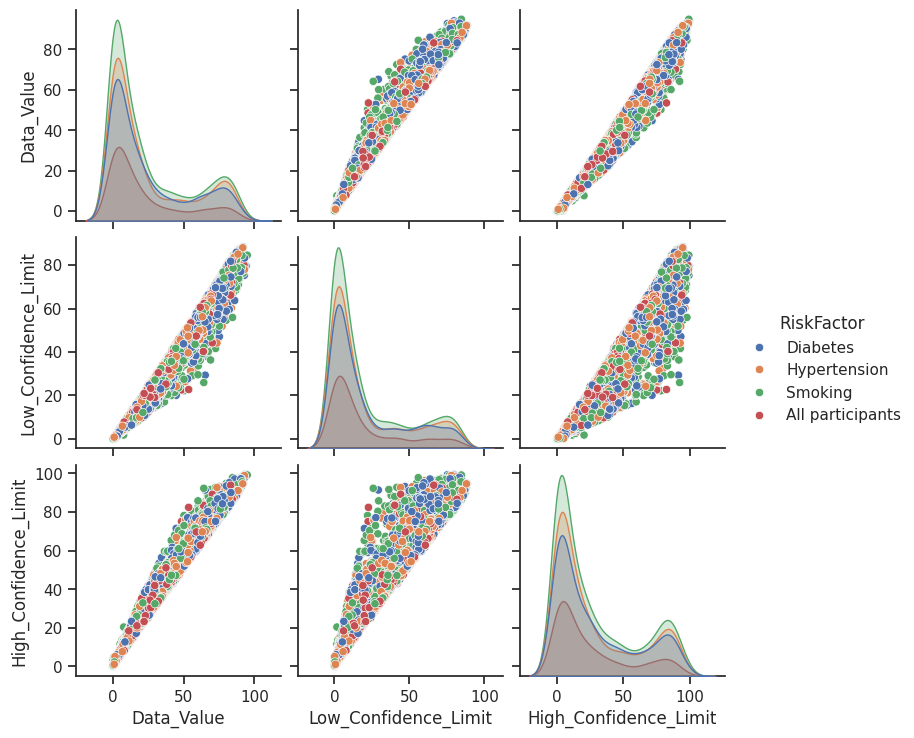

In [11]:
# Mengatur gaya tampilan grafik dengan 'ticks' dan menambahkan warna berdasarkan kategori
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,vars = [ 'Data_Value','Low_Confidence_Limit','High_Confidence_Limit'],hue="RiskFactor")
plt.show()

Hubungan Antar Variabel:

Terlihat bahwa ada korelasi positif yang kuat antara Data_Value, Low_Confidence_Limit, dan High_Confidence_Limit. Ini ditunjukkan oleh pola diagonal di mana titik-titik berkumpul membentuk garis lurus dari kiri bawah ke kanan atas. Artinya, ketika Data_Value meningkat, nilai dari Low_Confidence_Limit dan High_Confidence_Limit cenderung meningkat pula, dan sebaliknya

In [12]:
# Mengubah data kolom risk factor menjadi integer
data['RiskFactor'] = data['RiskFactor'].map({"Diabetes":1, "Hypertension":2,"Smoking":3, "All Participant":4, "NaN": 0})

# Memilih semua kolom yang bertipe data numerik dari dataset
numerical_data = data[['Data_Value','RiskFactor', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']]

# Menghitung matriks korelasi Pearson untuk data numerik
Tcorrelation = numerical_data.corr(method='pearson')

# Tampilkan korelasi
Tcorrelation

,Data_Value,RiskFactor,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
Data_Value,1.000000,-0.008176,0.989473,0.992447,-0.074494
RiskFactor,-0.008176,1.000000,-0.005995,-0.010400,-0.042881
Low_Confidence_Limit,0.989473,-0.005995,1.000000,0.965152,-0.034239
High_Confidence_Limit,0.992447,-0.010400,0.965152,1.000000,-0.109877
Sample_Size,-0.074494,-0.042881,-0.034239,-0.109877,1.000000


In [13]:
# Menghapus kolom yang memiliki lebih dari 50% NaN
Tcorrelation_cleaned = Tcorrelation.dropna(axis=1, thresh=int(0.5 * len(Tcorrelation)))

# Menghapus baris yang memiliki lebih dari 50% NaN
Tcorrelation_cleaned = Tcorrelation_cleaned.dropna(axis=0, thresh=int(0.5 * len(Tcorrelation.columns)))

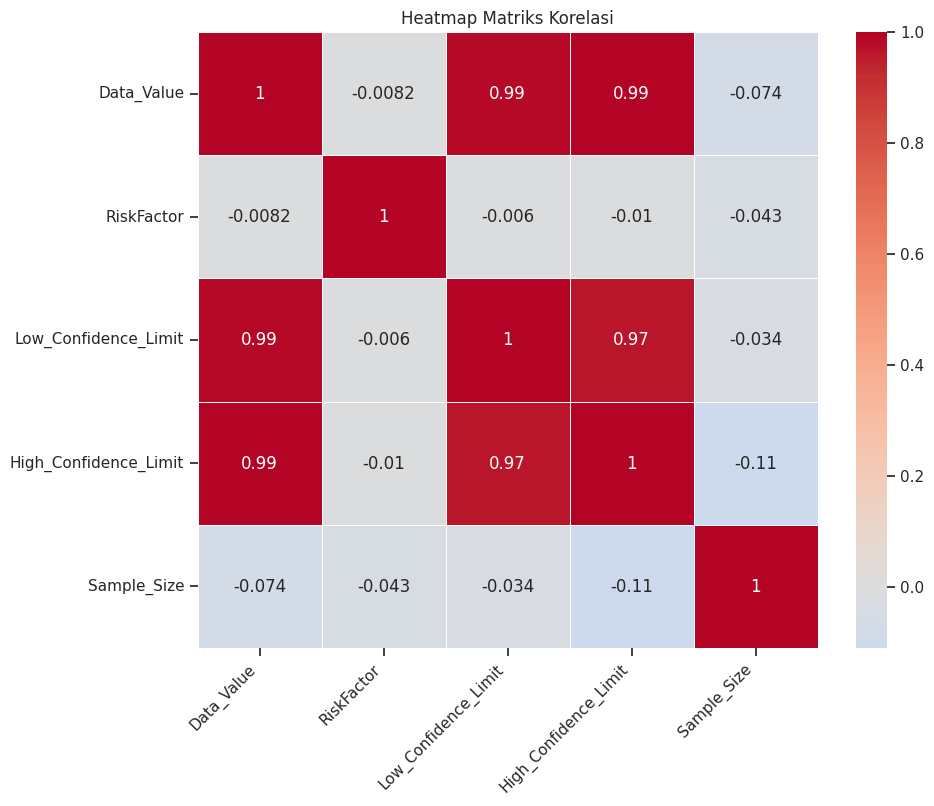

In [14]:
# Membuat heatmap dari matriks korelasi yang telah dibersihkan
plt.figure(figsize=(10, 8))

sns.heatmap(Tcorrelation_cleaned, xticklabels=Tcorrelation_cleaned.columns, yticklabels=Tcorrelation_cleaned.columns,
            annot=True, cmap='coolwarm', center=0, linewidths=0.5,linecolor='white')
plt.title('Heatmap Matriks Korelasi')

# Menyesuaikan rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan heatmap
plt.show()



1.   Data_Value, Low_Confidence_Limit, dan High_Confidence_Limit memiliki korelasi yang sangat tinggi (hampir 1), menunjukkan bahwa ketiga variabel ini memiliki hubungan positif yang kuat. Ini mungkin menunjukkan bahwa nilai data utama (Data_Value) sangat berhubungan dengan batas kepercayaan atas dan bawah.
2.   RiskFactor memiliki nilai korelasi yang sangat kecil atau mendekati 0 dengan variabel lain, menunjukkan bahwa faktor risiko ini tidak memiliki hubungan linier yang signifikan dengan variabel lain dalam dataset ini.
3. Sample_Size memiliki korelasi negatif lemah dengan variabel lain, misalnya -0.082 dengan Data_Value dan -0.12 dengan High_Confidence_Limit, yang menunjukkan sedikit hubungan negatif.

